### Bonus. Learning Rate Schedulers

The following template code implements the gradient descent algorithm on the loss function $y = x^2$. The `optimize` function executes 20 iterations of the algorithm using a constant learning rate. After that, the value of $x$ and the learning rate throughout the 20 iterations are plotted with `plot_results`.

**Your task**:
1. Vary the initial learning rate and the initial value of $x$ while keeping the learning rate a constant. What is the limitation of using a constant learning rate? (*Hint*: Models in real life are likely much more complex than this function.)
1. Modify the function `optimize` to apply different learning rate schedulers (you may either change to code to insert the scheduler, or pass it as a parameter).
1. Pick one of your favourite learning rate schedulers and explain in not more than 5 sentences how it improves convergence. Highlight any interesting observations if any.

**Submission:** Send me a screenshot of your graph and the writeup before / during the tutorial (for bonus EXP)!

You may check out [Pytorch documentation](https://pytorch.org/docs/stable/optim.html) for the different learning rate schedulers available, and their respective parameters.

In [3]:
import torch
import matplotlib.pyplot as plt

In [4]:
def f(x):
    return x**2

In [5]:
def optimize(initial_lr=1.05, num_iterations=20):
    x = torch.tensor(500.0, requires_grad=True)
    x_history = []
    lr_history = []

    optimizer = torch.optim.SGD([x], lr=initial_lr)
    
    # TODO: Insert your learning rate scheduler
    
    for i in range(num_iterations):
        optimizer.zero_grad()
        loss = f(x)
        loss.backward()
        optimizer.step()

        x_history.append(x.item())
        lr_history.append(initial_lr)

    print(f"Value of x after {num_iterations} iterations: {x.item()}")

    return x_history, lr_history

In [6]:
def plot_results(results):
    """
    results should be a dictionary containing one entry for each gradient descent run.
    The entry must also be a tuple in the form (x_history, lr_history).
    """
    plt.figure(figsize = (12,6))
    plt.subplot(1, 2, 1)
    for name, result in results.items():
        plt.plot(result[0], label=name)
    plt.xlabel('Iterations')
    plt.ylabel('x')
    plt.legend()
    plt.title('x vs Iterations')

    plt.subplot(1, 2, 2)
    for name, result in results.items():
        plt.plot(result[1], label=name)
    plt.xlabel('Iterations')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.title('Learning Rate vs Iterations')

    plt.show()

Value of x after 20 iterations: 3363.744384765625
Value of x after 20 iterations: 5.764606952667236


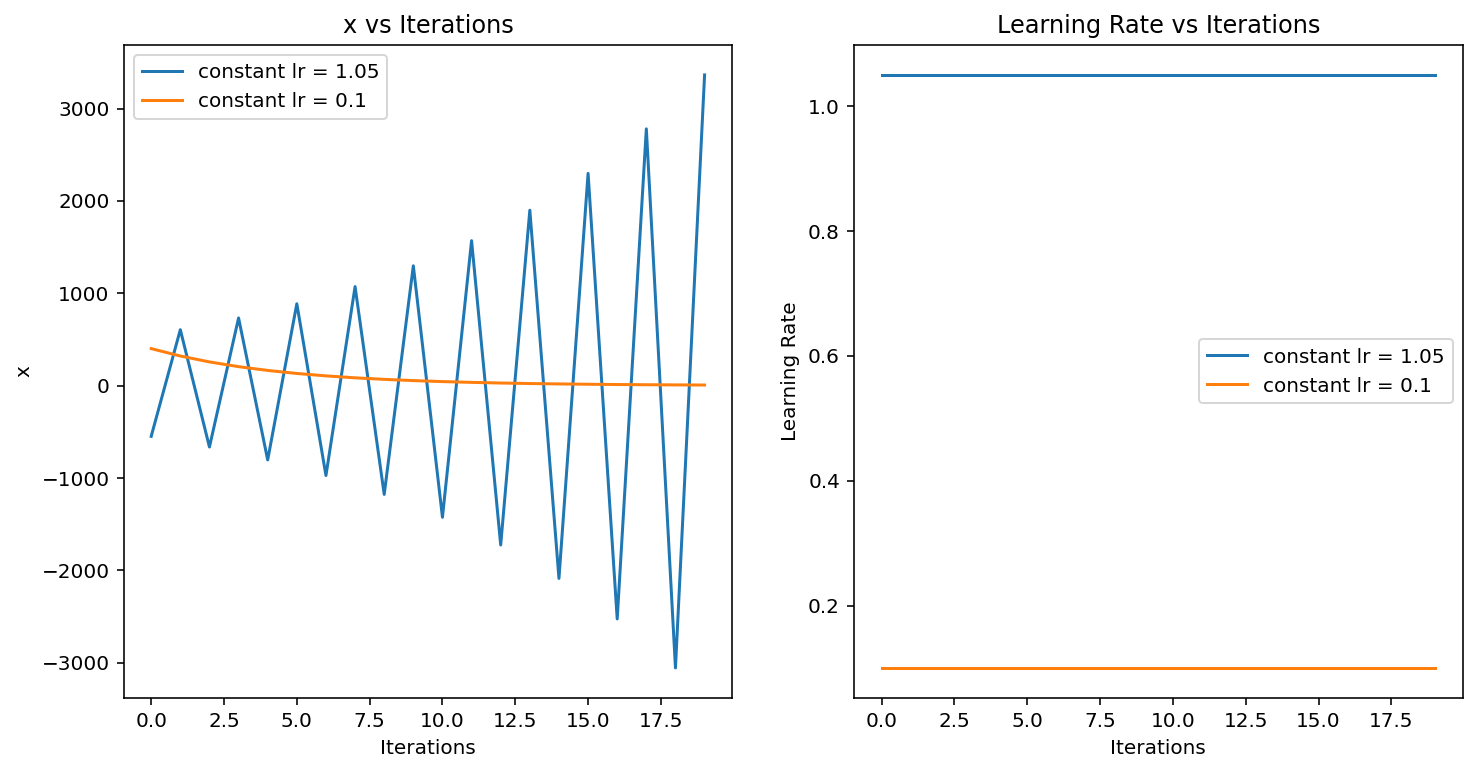

In [7]:
results = {}

# Default argument: lr = 1.05
results["constant lr = 1.05"] = optimize()

# Try out a different learning rate
results["constant lr = 0.1"] = optimize(0.1)

plot_results(results)